# A. Wave analysis - Terschelling (Netherlands)

## Analysis of Time Series. Waves in Coastal Waters

In [1]:
# os
import os
import os.path as op
import sys

# arrays
import math
import numpy as np
import pandas as pd
from scipy import signal as sg

# plot
import matplotlib.pyplot as plt
import plotly.express as px

sys.path.insert(0, os.path.join(os.getcwd()  , '..', '..', '..'))

# dependencies
from lib.eta_spec import *

In [2]:
import warnings
warnings.filterwarnings("ignore")
colors = px.colors.qualitative.Plotly

In [5]:
# path to data
p_data = op.abspath(op.join(os.getcwd(),'..', '..', '..', 'data', 'Terscheling'))

fop04930 = np.loadtxt(op.join(p_data, "fop04930.txt"))
fop05235 = np.loadtxt(op.join(p_data,"fop05235.txt"))
fra05092 = np.loadtxt(op.join(p_data,"fra05092.txt"))
fre05400 = np.loadtxt(op.join(p_data,"fre05400.txt"))
fri05276 = np.loadtxt(op.join(p_data,"fri05276.txt"))
fri05658 = np.loadtxt(op.join(p_data,"fri05658.txt"))

# Select deploy
datos = fop04930

**Location**

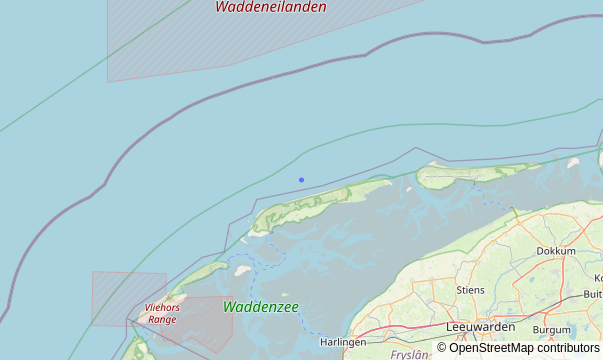

In [25]:
fig = px.scatter_mapbox(
    pd.DataFrame({'lat': [53.44], 'lon': [5.3]}), lon="lon",  lat="lat",
    mapbox_style='open-street-map',
    zoom=8
)
fig.update_layout(margin={'r':0, 'l':0, 't': 0, 'b':0})
fig.show()

**Field data**

## A.1 Observations

### Time Series: Sea State

In [4]:
# The free surface elevation can be seen as a Gaussian process

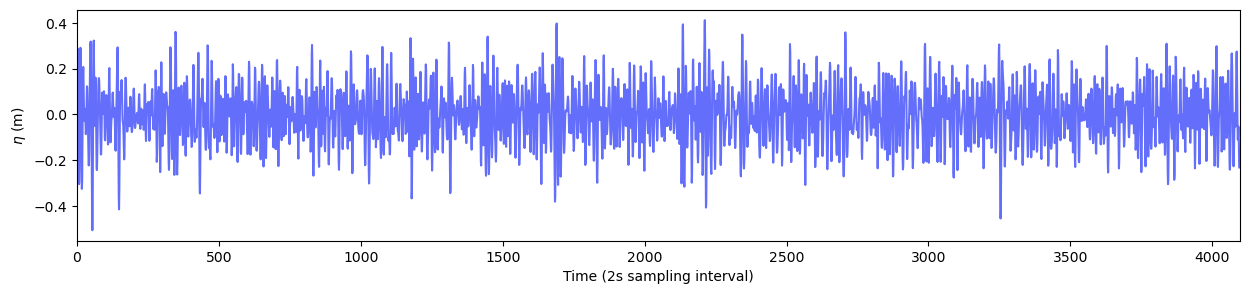

In [6]:
plt.figure(figsize=(15, 3))
plt.plot(datos, color=colors[0])
plt.xlabel('Time (2s sampling interval)')
plt.ylabel('$\eta$ (m)')
plt.xlim([0, len(datos)])
plt.show()

In [6]:
print("Mean:              ", np.mean(datos))
print("Standar Deviation: ", np.var(datos))

Mean:               2.197265624999758e-07
Standar Deviation:  0.014529366594190001


## A.2. Signall Processing

In [7]:
# Calculate spectra help(sg.welch)
f, E = sg.welch(datos, fs = 2, nfft = len(datos))

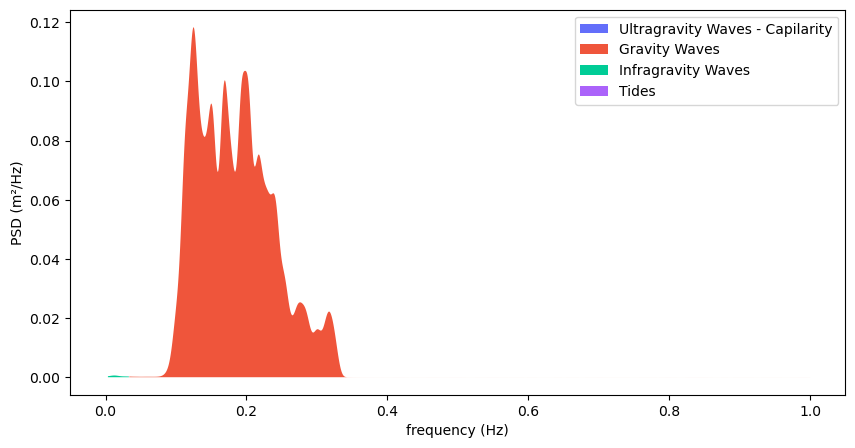

In [8]:
# Plot wave spectrum
plt.figure(figsize=(10,5))
plt.fill_between(f[np.where(1/f < 1)], E[np.where(1/f < 1)], label='Ultragravity Waves - Capilarity', fc=colors[0])
plt.fill_between(f[np.where((1/f > 1) & (1/f < 30))], E[np.where((1/f > 1) & (1/f < 30))], label='Gravity Waves', fc=colors[1])
plt.fill_between(f[np.where((1/f > 30) & (1/f < 5*60))], E[np.where((1/f > 30) & (1/f < 5*60))], label='Infragravity Waves', fc=colors[2])
plt.fill_between(f[np.where((1/f > 10000))], E[np.where((1/f > 10000))], label='Tides', fc=colors[3])

plt.xlabel('frequency (Hz)')
plt.ylabel('Densidad espectral (/Hz)')
plt.ylabel('PSD (m²/Hz)')
plt.legend()
plt.show()

## A.3 Short-term statistics

Definition of ‘waves’ in a time record of the surface elevation with upward zero-crossings

In [9]:
fs = 1/2 # 2 s
T, H = upcrossing(datos, fs)

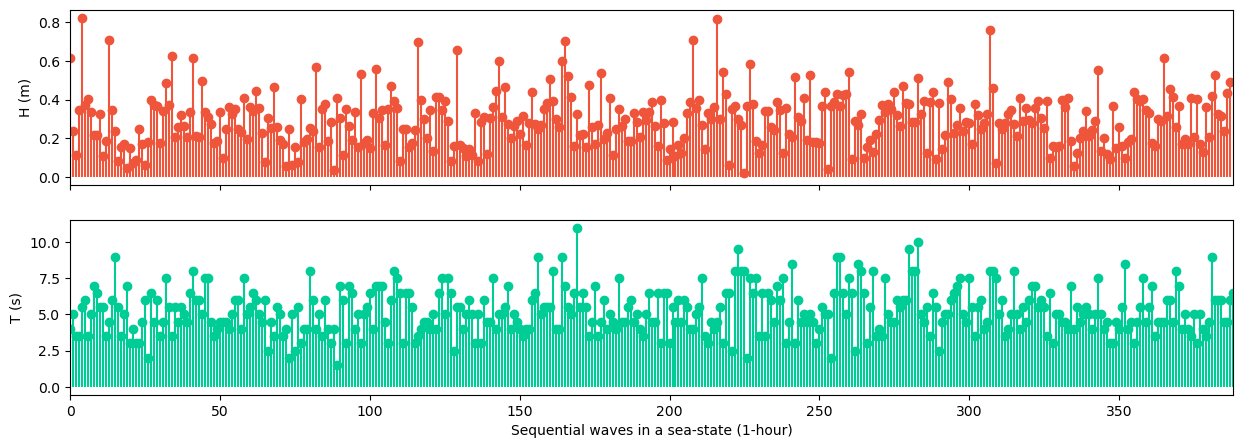

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(15,5), sharex=True)
axs[0].vlines(range(len(H)), np.full(len(H), 0), H, color=colors[1])
axs[1].vlines(range(len(T)), np.full(len(T), 0), T, color=colors[2])
axs[0].scatter(range(len(H)), H, color=colors[1])
axs[1].scatter(range(len(T)), T, color=colors[2])

axs[0].set_ylabel('H (m)')
axs[1].set_ylabel('T (s)')
axs[1].set_xlabel('Sequential waves in a sea-state (1-hour)')
axs[0].set_xlim(0, len(H))
plt.show()

**Wave height statistics**

`mean wave heigh` $\overline H$

$\overline H = \frac{1}{N} \sum_{i=1}^{N} H_{i}$ <br> where i is the sequence number (in time) of the wave in the record

`root-mean-square wave height` $H_{rms}$

$H_{rms}=(\frac{1}{N} \sum_{i=1}^{N} H_{i}^{2})^{1/2}$

`significant wave heigh` $H_{1/3}$

$H_{1/3}=\frac{1}{N/3} \sum_{j=1}^{N/3} H_{j}$ <br> where j is the rank number of the wave, based on wave-heigh

`mean of the highest one-tenth of waves` $H_{1/10}$

$H_{1/10}=\frac{1}{N/10} \sum_{j=1}^{N/10} H_{j}$ 

`mean zero-crossing wave period` $\overline T_{0}$

$\overline T_{0}=\frac{1}{N} \sum_{i=1}^{N} T_{0,i}$

`significant wave period` $T_{1/3}$

$T_{1/3}=\frac{1}{N/3} \sum_{j=1}^{N/3} T_{0,j}$

In [11]:
# mean wave height
print("mean wave height:                        " + str(np.round(np.mean(H), 2)))

# root-mean-square wave height
print("root-mean-square wave height:            " + str(np.round(rmsV(H), 2)))

# significant wave heigh
print("significant wave height:                 " + str(np.round(highestN_stats(H, 3), 2)))

mean wave height:                        0.29
root-mean-square wave height:            0.32
significant wave height:                 0.44
